<a href="https://colab.research.google.com/github/MRobalinho/Multispectral_Images/blob/master/Multispectral_Images_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Multispectral images

https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html

https://rasterio.readthedocs.io/en/latest/topics/reading.html

MRobalinho 9-1-2019

In [10]:
# Readind (upload) Files
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving g31d.tif to g31d.tif
Saving g31ds.tif to g31ds.tif
Saving g32d.tif to g32d.tif
Saving MARBIBM.TIF to MARBIBM.TIF
Saving ortex.tiff to ortex.tiff
User uploaded file "g31d.tif" with length 129920 bytes
User uploaded file "g31ds.tif" with length 130064 bytes
User uploaded file "g32d.tif" with length 82622 bytes
User uploaded file "MARBIBM.TIF" with length 2640376 bytes
User uploaded file "ortex.tiff" with length 190367 bytes


In [0]:
# GDAL is pretty good at opening multiband rasters, and supports 11 different band types, including int16.

from osgeo import gdal
import numpy as np
import sys

In [0]:
file = 'MARBIBM.TIF'

In [0]:
filetif = gdal.Open(file)

In [22]:
# loop through each band
for bi in range(filetif.RasterCount):
    band = filetif.GetRasterBand(bi + 1)
    # Read this band into a 2D NumPy array
    ar = band.ReadAsArray()
    print('Band %d has type %s'%(bi + 1, ar.dtype))
    raw = ar.tostring()

Band 1 has type uint8
Band 2 has type uint8
Band 3 has type uint8


In [0]:
band1 = filetif.GetRasterBand(1)

In [24]:
print(filetif.GetMetadata())

{'TIFFTAG_RESOLUTIONUNIT': '2 (pixels/inch)', 'TIFFTAG_XRESOLUTION': '300', 'TIFFTAG_YRESOLUTION': '300'}


In [0]:
# band statistics.
def statBand(file):
  
    filetif = gdal.Open(file)

    print("[ RASTER BAND COUNT ] for file : ",file, "  Bands:",  filetif.RasterCount)
    for band in range( filetif.RasterCount ):
        band += 1
        print("[ GETTING BAND ]: ", band)
        srcband = filetif.GetRasterBand(band)
        if srcband is None:
            continue

        stats = srcband.GetStatistics( True, True )
        if stats is None:
            continue

        print("[ STATS ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % ( \
                    stats[0], stats[1], stats[2], stats[3] ))
    return

In [26]:
statBand(file)

[ RASTER BAND COUNT ] for file :  MARBIBM.TIF   Bands: 3
[ GETTING BAND ]:  1
[ STATS ] =  Minimum=0.000, Maximum=255.000, Mean=125.255, StdDev=69.456
[ GETTING BAND ]:  2
[ STATS ] =  Minimum=0.000, Maximum=255.000, Mean=121.911, StdDev=68.796
[ GETTING BAND ]:  3
[ STATS ] =  Minimum=0.000, Maximum=255.000, Mean=103.117, StdDev=75.923


In [0]:
# Band Information

def bandInformation( band_num, input_file ):
    print("[ RASTER BAND COUNT ] for file : ",input_file, "  Information Band:",  band_num)
    src_ds = gdal.Open( input_file )
    
    srcband = src_ds.GetRasterBand(band_num)

    print("[ NO DATA VALUE ] = ", srcband.GetNoDataValue())
    print("[ MIN ] = ", srcband.GetMinimum())
    print("[ MAX ] = ", srcband.GetMaximum())
    print("[ SCALE ] = ", srcband.GetScale())
    print("[ UNIT TYPE ] = ", srcband.GetUnitType())
    ctable = srcband.GetColorTable()

    if ctable is None:
        print('No ColorTable found')
        sys.exit(1)

    print("[ COLOR TABLE COUNT ] = ", ctable.GetCount())
    for i in range( 0, ctable.GetCount() ):
        entry = ctable.GetColorEntry( i )
        if not entry:
            continue
        print("[ COLOR ENTRY RGB ] = ", ctable.GetColorEntryAsRGB( i, entry ))
        
    return srcband

In [28]:
# call band Information
srcband = bandInformation( 1, file)

[ RASTER BAND COUNT ] for file :  MARBIBM.TIF   Information Band: 1
[ NO DATA VALUE ] =  None
[ MIN ] =  0.0
[ MAX ] =  255.0
[ SCALE ] =  1.0
[ UNIT TYPE ] =  
No ColorTable found


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [29]:
srcband

NameError: ignored

In [0]:
# Read Band 1 froma TIFF file
import numpy as np
from osgeo import gdal
ds = gdal.Open(file)
myarray = np.array(ds.GetRasterBand(1).ReadAsArray())

In [31]:
myarray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [32]:
myarray.shape

(1001, 1419)

In [33]:
myarray.size

1420419

In [34]:
# Same exercice using RASTERIO 
!pip install rasterio


    100% |████████████████████████████████| 18.5MB 1.6MB/s 


In [0]:
import rasterio

In [36]:
with rasterio.open(file, 'r+') as ds:
    arr = ds.read()  # read all raster values
    arr[0, 10, 20] = 3  # change a pixel value on band 1, row 11, column 21
    ds.write(arr)

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:218: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = get_writer_for_path(path)(path, mode, driver=driver, **kwargs)


In [0]:
from matplotlib import pyplot

In [38]:
# Read TIF file
file = 'example3.tiff'
ds = gdal.Open(file)

# Statistics from file
statBand(file)

[ RASTER BAND COUNT ] for file :  example3.tiff   Bands: 3
[ GETTING BAND ]:  1
[ STATS ] =  Minimum=0.000, Maximum=231.000, Mean=33.455, StdDev=57.900
[ GETTING BAND ]:  2
[ STATS ] =  Minimum=0.000, Maximum=233.000, Mean=42.146, StdDev=71.172
[ GETTING BAND ]:  3
[ STATS ] =  Minimum=0.000, Maximum=227.000, Mean=27.744, StdDev=52.264


In [0]:
# Plot Band 
def plotBand( ds, num, color):

    myarray1 = np.array(ds.GetRasterBand(num).ReadAsArray())

    pyplot.imshow(myarray1, cmap= color)
    pyplot.show() 
    
    return

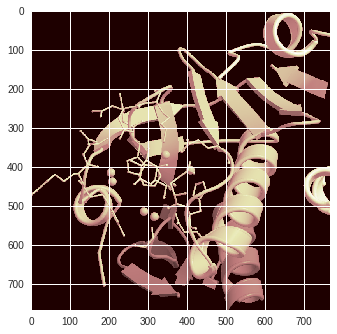

In [40]:
# Plot band 1
plotBand(ds, 1, 'pink')

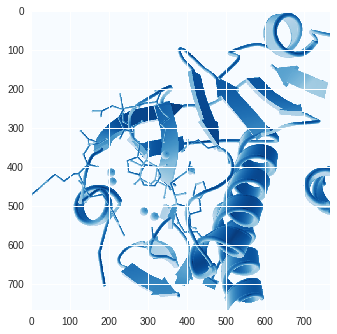

In [41]:

# Plot band 2
plotBand(ds, 2, 'Blues')

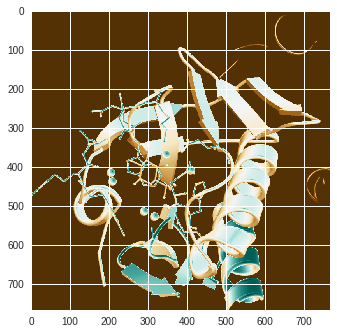

In [43]:
# Plot Band 3
plotBand(ds, 3, 'BrBG')